[View in Colaboratory](https://colab.research.google.com/github/karawalla/deeplearning/blob/master/DLBasicsNotes.ipynb)

In [2]:
import keras

from keras.datasets import imdb
import numpy as np


def vectorize_data(data, dimensions=10000):
  vector_data = np.zeros((len(data), dimensions))
  for i, item in enumerate(data):
    vector_data[i, item] = 1.
   
  return vector_data
  
  
  
  
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(max([max(sequence) for sequence in train_data]))

wi = imdb.get_word_index()

reverse_wi = dict([(value, key) for (key, value) in wi.items()])

decoded_review = ' '.join([reverse_wi.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(len(x_train))





Using TensorFlow backend.


17465344/17464789 [==============================] - 3s 0us/step
9999
1646592/1641221 [==============================] - 1s 1us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up

In [22]:

from keras import layers
from keras import models
from keras import optimizers
from keras import metrics
from keras import losses

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])


partial_x = x_train[:10000]
x = x_train[10000:]

partial_y = y_train[:10000]
y = y_train[10000:]

history = model.fit(partial_x, partial_y, epochs=4, batch_size=512, validation_data=(x,y))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_30 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 10000 samples, validate on 15000 samples
Epoch 1/4
10000/10000 [==============================] - 2s 192us/step - loss: 0.5535 - binary_accuracy: 0.7448 - val_loss: 0.4404 - val_binary_accuracy: 0.8393
Epoch 2/4
10000/10000 [==============================] - 2s 153us/step - loss: 0.3406 - binary_accuracy: 0.8988 - val_loss: 0.3717 - val_binary_accuracy: 0.8523
Epoch 3/4
10000/10000 [=====

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


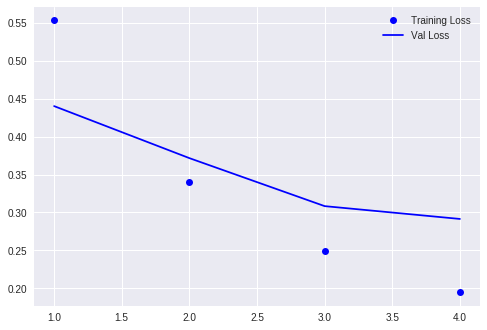

In [23]:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.xlabel = 'Epochs'
plt.ylabel = "Loss"
plt.legend()
plt.show()







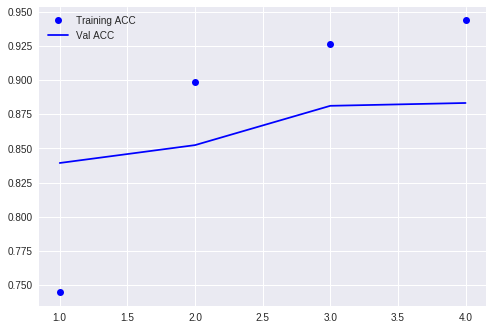

In [24]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training ACC')
plt.plot(epochs, val_acc, 'b', label='Val ACC')
plt.xlabel = 'Epochs'
plt.ylabel = "ACC"
plt.legend()
plt.show()


In [25]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 4s 147us/step


In [26]:
results

[0.3092923516845703, 0.87736]

In [0]:
pred = model.predict(x_test)

In [29]:
pred[0]

array([0.33294198], dtype=float32)

In [33]:
pred[200]

array([0.8256953], dtype=float32)

In [34]:
decoded_review = ' '.join([reverse_wi.get(i - 3, "?") for i in test_data[200]])
print(decoded_review)


? don't be fooled this isn't yet another tired example of the girls from outer space pretending to be the french ? team come to earth to collect as much ? as possible genre though the synopsis may suggest otherwise this movie is a gem an absolute jewel that has ? my life from the moment i laid eyes upon it hilarious ? action packed and stunningly erotic ? is a euro ? tour de force a grossly underrated ? classic br br stop everything you are doing and run out to rent or better yet buy this movie immediately
